In [1]:
from social_dilemmas.envs.pettingzoo_env import MAX_CYCLES
from social_dilemmas.envs.pettingzoo_env import env as aec_env
from social_dilemmas.envs.pettingzoo_env import parallel_env
from pettingzoo.test import api_test, parallel_api_test

In [ ]:
from stable_baselines3.ppo import CnnPolicy
from stable_baselines3 import PPO
import supersuit as ss

In [2]:
import numpy as np

from social_dilemmas.envs.pettingzoo_env import MAX_CYCLES

env = aec_env(env = "harvest", num_agents = 2)
env.seed()
env.reset()
n_act = env.action_space("agent-0").n

In [3]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env.metadata['name'],step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

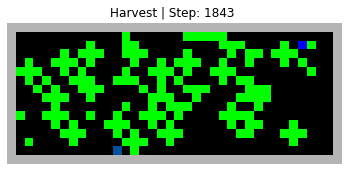

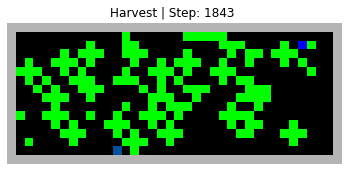

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

from IPython import display
from random import randint

counter = 0
for agent in env.agent_iter(200):
    display.display(plt.gcf())
    counter += 1
    obs, reward, done, info = env.last()        
    action = randint(0,n_act-1) if not done else None
    env.step(action)
    show_state(env, counter)

In [ ]:
env.observation_space("agent-0")["curr_obs"]

In [ ]:
for agent in env.agent_iter(MAX_CYCLES * env.num_agents):
    env.last()
    action = np.random.randint(n_act)
    env.step(action)
    if not env.agents:
        env.reset()
api_test(env, MAX_CYCLES)

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)
env.seed()
env.reset()
n_act = env.action_space("agent-0").n
for _ in range(MAX_CYCLES * env.num_agents):
    actions = {agent: np.random.randint(n_act) for agent in env.agents}
    _, _, _, _ = env.step(actions)
    if not env.agents:
        _ = env.reset()
parallel_api_test(env, MAX_CYCLES)

In [ ]:
env = parallel_env(max_cycles=MAX_CYCLES, env="harvest", num_agents=2)

In [ ]:
model = PPO(
    CnnPolicy,
    env,
    verbose=3,
    gamma=0.95,
    n_steps=256,
    ent_coef=0.0905168,
    learning_rate=0.00062211,
    vf_coef=0.042202,
    max_grad_norm=0.9,
    gae_lambda=0.99,
    n_epochs=5,
    clip_range=0.3,
    batch_size=1024,
)